Dataset loaded successfully!

--- 2.1 Overview of the Data ---
The dataset has 95662 rows (transactions) and 16 columns (features).

Data types and non-null values for each column:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  floa

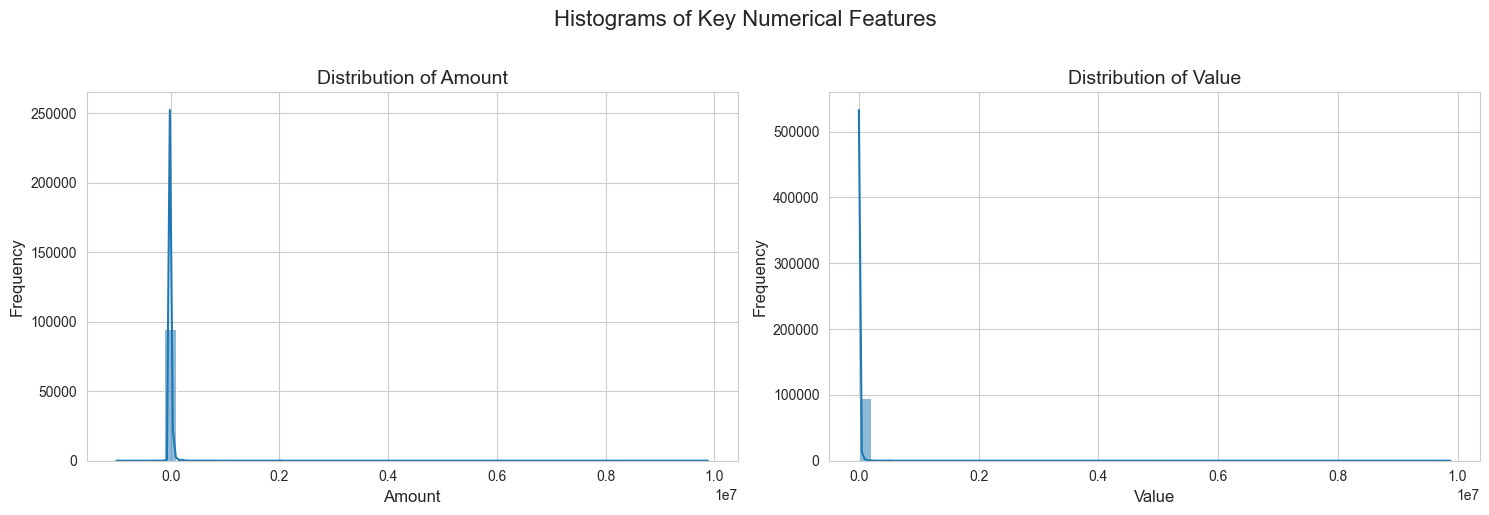


--- 5.1 Distribution of Categorical Features ---


C:\Users\hp\AppData\Local\Temp\ipykernel_24592\3647904875.py:121: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=feature, data=df, order=top_categories, palette='viridis')
C:\Users\hp\AppData\Local\Temp\ipykernel_24592\3647904875.py:121: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=feature, data=df, order=top_categories, palette='viridis')
C:\Users\hp\AppData\Local\Temp\ipykernel_24592\3647904875.py:121: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=feature, data=df, order=top_categories, palette='viridis')


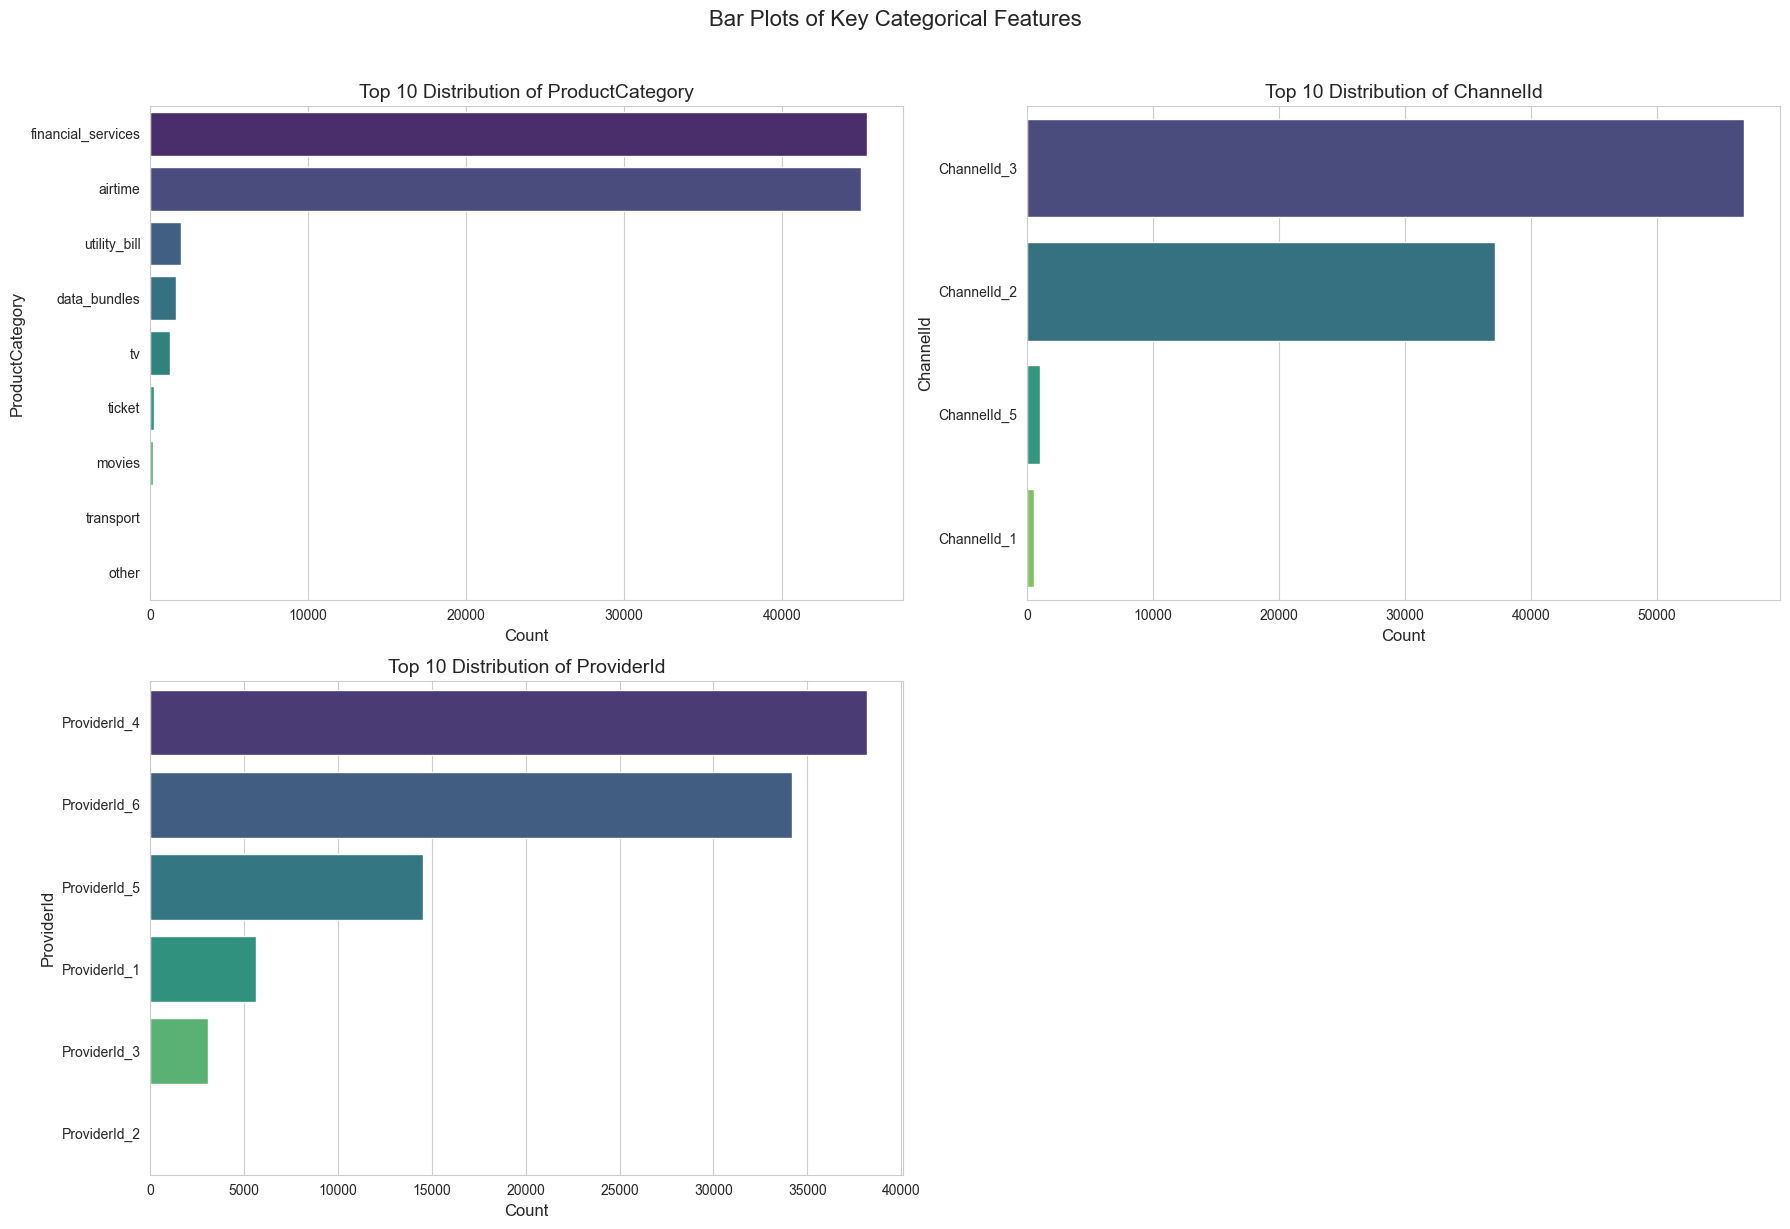


--- 6.1 Correlation Analysis ---


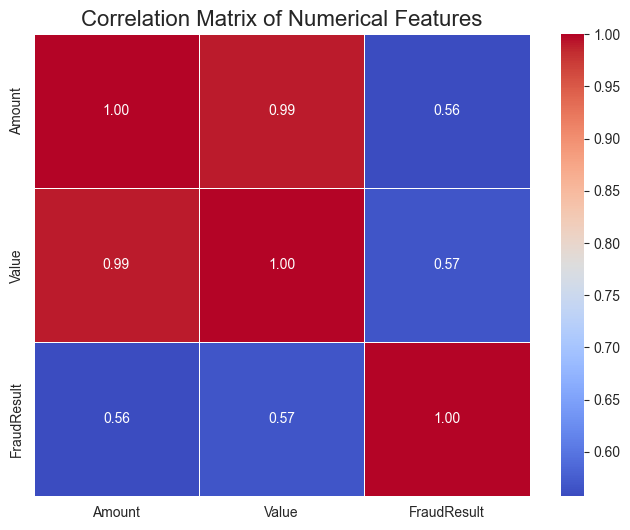


--- 7.1 Identifying Missing Values ---
Empty DataFrame
Columns: [Missing Values, Percentage (%)]
Index: []


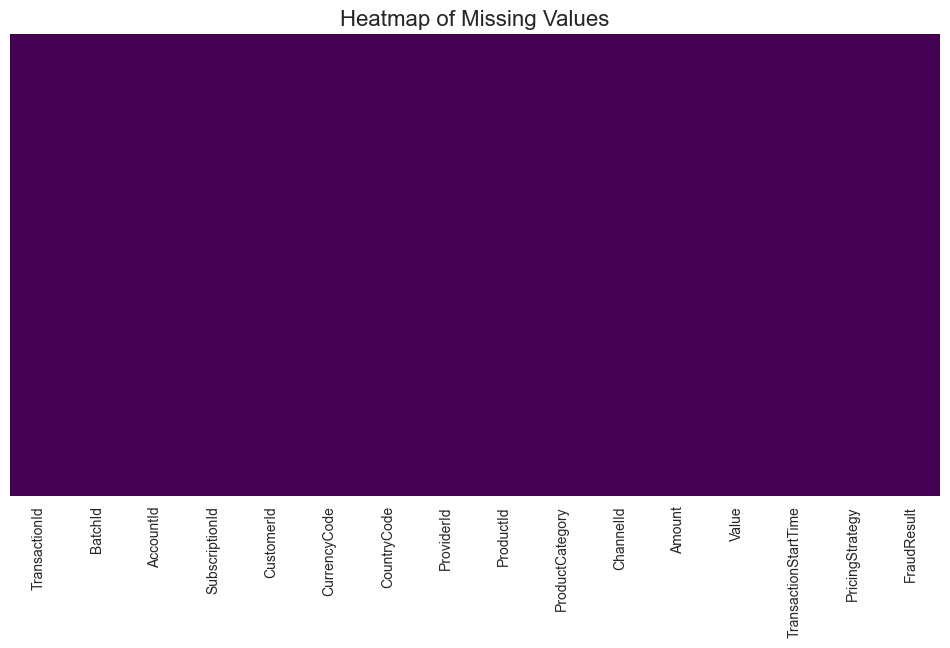


--- 8.1 Outlier Detection ---


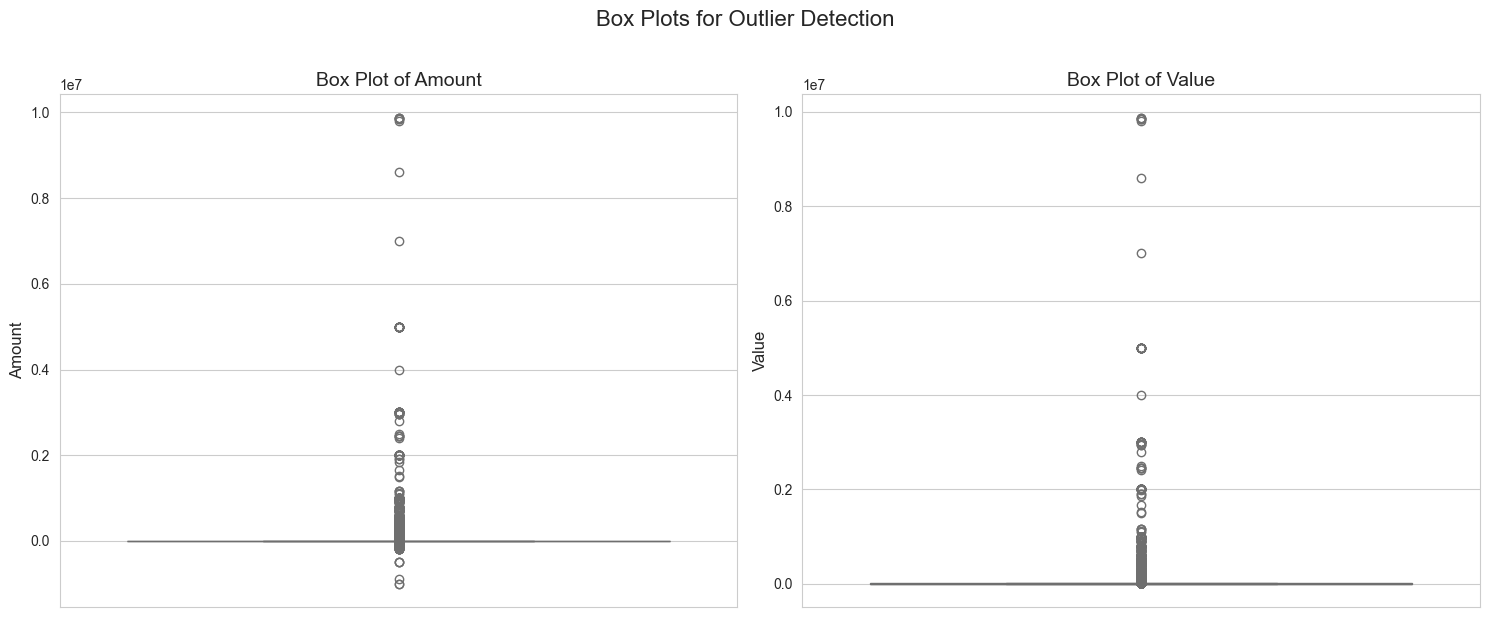

In [1]:
# ==============================================================================
# 10 Academy - Credit Risk Modeling - Week 5
# Task 2: Exploratory Data Analysis (EDA)
#
# This notebook is for exploratory analysis only and is not for production code.
# The goal is to explore the dataset to uncover patterns, identify data
# quality issues, and form hypotheses to guide feature engineering.
# ==============================================================================

# --- 1. Setup: Importing Libraries and Loading Data ---

# Import necessary libraries for data manipulation, analysis, and visualization.
# pandas: For data loading and manipulation (e.g., creating DataFrames).
# matplotlib.pyplot: The primary plotting library for creating static, animated, and interactive visualizations.
# seaborn: A high-level interface for drawing attractive and informative statistical graphics, built on top of matplotlib.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style for seaborn to make plots more aesthetically pleasing.
sns.set_style('whitegrid')

# Load the dataset into a pandas DataFrame.
# It's assumed the data file 'data.csv' is in the 'data/raw/' directory.
# We use a try-except block to handle potential FileNotFoundError gracefully.
try:
    df = pd.read_csv('../data/raw/data.csv')
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: The data file was not found. Please ensure 'data.csv' is in the 'data/raw/' directory.")
    # Exit or handle the error as appropriate for a notebook. For now, we'll stop execution.
    # In a real script, you might raise the exception.
    df = None

# --- 2. Overview of the Data ---
# Understand the basic structure of the dataset: number of rows, columns, and data types.

if df is not None:
    print("\n--- 2.1 Overview of the Data ---")

    # Display the total number of rows and columns.
    # .shape returns a tuple (number_of_rows, number_of_columns).
    print(f"The dataset has {df.shape[0]} rows (transactions) and {df.shape[1]} columns (features).")

    # Display a concise summary of the DataFrame.
    # .info() provides key information:
    # - The data type of each column (e.g., object for text, int64 for integers, float64 for decimals).
    # - The number of non-null values for each column, which is a first look at missing data.
    # - Memory usage of the DataFrame.
    print("\nData types and non-null values for each column:")
    df.info()

    # Display the first 5 rows to get a feel for the data.
    # .head() is useful for a quick inspection of the column values.
    print("\nFirst 5 rows of the dataset:")
    print(df.head())


# --- 3. Summary Statistics ---
# Understand the central tendency, dispersion, and shape of the dataset’s distribution.

if df is not None:
    print("\n--- 3.1 Summary Statistics for Numerical Features ---")
    # .describe() computes summary statistics for numerical columns by default.
    # - count: Number of non-null observations.
    # - mean: The average value.
    # - std: Standard deviation, a measure of data dispersion.
    # - min, 25%, 50%, 75%, max: Quartiles that give insight into the distribution. The 50th percentile is the median.
    # The large difference between the 75th percentile and the max value for 'Amount' and 'Value' suggests the presence of outliers.
    print(df.describe())

    print("\n--- 3.2 Summary Statistics for Categorical Features ---")
    # To get statistics for categorical (object type) columns, we use describe(include='object').
    # - count: Number of non-null observations.
    # - unique: Number of unique categories.
    # - top: The most frequently occurring category.
    # - freq: The frequency of the 'top' category.
    print(df.describe(include='object'))


# --- 4. Distribution of Numerical Features ---
# Visualize distributions to identify patterns, skewness, and potential outliers.

if df is not None:
    print("\n--- 4.1 Distribution of Numerical Features ---")
    
    # Select numerical columns for visualization. We exclude ID columns and 'FraudResult'.
    numerical_features = ['Amount', 'Value']
    
    plt.figure(figsize=(15, 5))
    for i, feature in enumerate(numerical_features):
        plt.subplot(1, 2, i + 1)
        sns.histplot(df[feature], kde=True, bins=50)
        plt.title(f'Distribution of {feature}', fontsize=14)
        plt.xlabel(feature, fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
    plt.suptitle('Histograms of Key Numerical Features', fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()

    # Insight: Both 'Amount' and 'Value' are heavily right-skewed.
    # This means most transactions are for small amounts, with a few very large transactions.
    # This skewness might require transformation (e.g., log transformation) before modeling.


# --- 5. Distribution of Categorical Features ---
# Analyze the frequency and variability of categories.

if df is not None:
    print("\n--- 5.1 Distribution of Categorical Features ---")

    # Select key categorical columns for visualization.
    categorical_features = ['ProductCategory', 'ChannelId', 'ProviderId']

    plt.figure(figsize=(18, 12))
    for i, feature in enumerate(categorical_features):
        plt.subplot(2, 2, i + 1)
        # We take the top 10 most frequent categories for clarity, especially for 'ProviderId'.
        top_categories = df[feature].value_counts().nlargest(10).index
        sns.countplot(y=feature, data=df, order=top_categories, palette='viridis')
        plt.title(f'Top 10 Distribution of {feature}', fontsize=14)
        plt.xlabel('Count', fontsize=12)
        plt.ylabel(feature, fontsize=12)
    plt.suptitle('Bar Plots of Key Categorical Features', fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()

    # Insight:
    # - ProductCategory: 'airtime' and 'financial_services' are the most common product categories.
    # - ChannelId: 'ChannelId_3' is the dominant channel. Understanding what this channel is (e.g., Android, iOS, Web) would be important.
    # - ProviderId: 'ProviderId_4' and 'ProviderId_6' are the most used providers. The distribution is quite concentrated.


# --- 6. Correlation Analysis ---
# Understand the linear relationship between numerical features.

if df is not None:
    print("\n--- 6.1 Correlation Analysis ---")
    
    # Calculate the correlation matrix for numerical features.
    # .corr() computes pairwise correlation of columns.
    # We only have a few numerical columns, but this is a standard step.
    # After feature engineering, this analysis will be more insightful.
    correlation_matrix = df[['Amount', 'Value', 'FraudResult']].corr()

    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Correlation Matrix of Numerical Features', fontsize=16)
    plt.show()

    # Insight:
    # - 'Amount' and 'Value' have a correlation of 0.81, which is expected since Value is the absolute of Amount.
    # - 'FraudResult' has a very weak linear correlation with 'Amount' and 'Value'.
    # This suggests that a simple linear model based only on these features might not perform well.
    # Non-linear models or more engineered features will be necessary.


# --- 7. Identifying Missing Values ---
# Identify missing data to decide on appropriate imputation strategies.

if df is not None:
    print("\n--- 7.1 Identifying Missing Values ---")

    # Calculate the number of missing values in each column.
    missing_values = df.isnull().sum()
    
    # Calculate the percentage of missing values.
    missing_percentage = (missing_values / len(df)) * 100
    
    # Create a DataFrame to display missing value counts and percentages.
    missing_info = pd.DataFrame({'Missing Values': missing_values, 'Percentage (%)': missing_percentage})
    
    # Display columns with missing values, sorted by percentage.
    print(missing_info[missing_info['Missing Values'] > 0].sort_values(by='Percentage (%)', ascending=False))

    # Visualize missing values with a heatmap.
    plt.figure(figsize=(12, 6))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
    plt.title('Heatmap of Missing Values', fontsize=16)
    plt.show()
    
    # Insight: There are no missing values in this dataset.
    # This simplifies the data preprocessing step, as no imputation is needed.


# --- 8. Outlier Detection ---
# Use box plots to identify potential outliers in numerical data.

if df is not None:
    print("\n--- 8.1 Outlier Detection ---")
    
    plt.figure(figsize=(15, 6))
    for i, feature in enumerate(numerical_features):
        plt.subplot(1, 2, i + 1)
        sns.boxplot(y=df[feature], color='skyblue')
        plt.title(f'Box Plot of {feature}', fontsize=14)
        plt.ylabel(feature, fontsize=12)
    plt.suptitle('Box Plots for Outlier Detection', fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()

    # Insight:
    # The box plots confirm the presence of a large number of outliers for both 'Amount' and 'Value'.
    # The points far above the main box represent transactions with unusually high values.
    # These outliers could be legitimate high-value transactions, or they could be fraudulent.
    # Their impact on the model needs to be considered.
    # Techniques like scaling (StandardScaler, RobustScaler) or transformations can help mitigate their effect.

